In [125]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt


lap_times = pd.read_csv('lap_times.csv', encoding="utf-8")
pit_stops = pd.read_csv('pit_stops.csv', encoding="utf-8")
qualifying = pd.read_csv('qualifying.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")

lap_times.head()
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [126]:
#rename milliseconds to stop time and race_time to avoid confusion
pit_stops.rename(columns = {'milliseconds': 'pit_time'}, inplace = True)
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
pit_merged = pd.merge(pit_stops, results, on=['raceId', 'driverId'])
pit_merged.head(20)


,raceId,driverId,stop,lap,time_x,duration,pit_time,resultId,constructorId,number,...,positionOrder,points,laps,time_y,race_time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,153,1,1,17:05:23,26.898,26898,20789,5,19,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
1,841,153,2,17,17:31:06,24.463,24463,20789,5,19,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
2,841,153,3,35,17:59:45,26.348,26348,20789,5,19,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
3,841,30,1,1,17:05:52,25.021,25021,20797,131,7,...,19,0.0,19,\N,\N,13,21,1:35.319,200.283,4
4,841,30,2,17,17:32:08,23.988,23988,20797,131,7,...,19,0.0,19,\N,\N,13,21,1:35.319,200.283,4
5,841,17,1,11,17:20:48,23.426,23426,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
6,841,17,2,26,17:44:29,22.520,22520,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
7,841,17,3,41,18:07:37,26.230,26230,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
8,841,4,1,12,17:22:34,23.251,23251,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
9,841,4,2,27,17:46:04,24.733,24733,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1


In [127]:
# Print all the column names in merged DataFrame
print(pit_merged.columns)

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration', 'pit_time',
       'resultId', 'constructorId', 'number', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'race_time', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'statusId'],
      dtype='object')


In [128]:
# retain only the columns we need and remove null values
selected_columns = ['raceId', 'driverId', 'stop', 'lap', 'pit_time', 'laps', 'race_time']
my_pit = pit_merged[selected_columns]

my_pit = my_pit.copy() # make copy to modify without changing original dataset

my_pit.rename(columns = {'lap': 'stop_lap', 'laps': 'total_laps', 'stop': 'number_of_stops' }, inplace = True)
my_pit.head(10)

,raceId,driverId,number_of_stops,stop_lap,pit_time,total_laps,race_time
0,841,153,1,1,26898,57,\N
1,841,153,2,17,24463,57,\N
2,841,153,3,35,26348,57,\N
3,841,30,1,1,25021,19,\N
4,841,30,2,17,23988,19,\N
5,841,17,1,11,23426,58,5408430
6,841,17,2,26,22520,58,5408430
7,841,17,3,41,26230,58,5408430
8,841,4,1,12,23251,58,5402031
9,841,4,2,27,24733,58,5402031


In [129]:
# remove missing values
my_pit.replace('\\N', np.nan, inplace=True)
my_pit.dropna(inplace=True)
my_pit.head()


,raceId,driverId,number_of_stops,stop_lap,pit_time,total_laps,race_time
5,841,17,1,11,23426,58,5408430
6,841,17,2,26,22520,58,5408430
7,841,17,3,41,26230,58,5408430
8,841,4,1,12,23251,58,5402031
9,841,4,2,27,24733,58,5402031


In [150]:
my_pit['lap_ratio'] = my_pit['stop_lap'] / my_pit['total_laps']
my_pit.head()

,raceId,driverId,number_of_stops,stop_lap,pit_time,total_laps,race_time,lap_ratio
5,841,17,1,11,23426,58,5408430,0.189655
6,841,17,2,26,22520,58,5408430,0.448276
7,841,17,3,41,26230,58,5408430,0.706897
8,841,4,1,12,23251,58,5402031,0.206897
9,841,4,2,27,24733,58,5402031,0.465517


In [151]:
my_pit.describe()

,raceId,driverId,number_of_stops,stop_lap,pit_time,total_laps,race_time,lap_ratio
count,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03,4686.000000,4.686000e+03,4686.000000
mean,947.008323,429.075331,1.784464,25.630602,8.513814e+04,59.404183,6.180112e+06,0.430968
std,70.279316,402.858714,0.929340,14.196514,2.963508e+05,8.459035,1.332154e+06,0.227630
min,841.000000,1.000000,1.000000,1.000000,1.317300e+04,43.000000,4.526665e+06,0.011494
25%,883.000000,13.000000,1.000000,14.000000,2.168825e+04,53.000000,5.495594e+06,0.245283
50%,942.000000,807.000000,2.000000,25.000000,2.329750e+04,57.000000,5.843543e+06,0.423077
75%,1011.000000,822.000000,2.000000,36.000000,2.568675e+04,66.000000,6.326271e+06,0.613636
max,1074.000000,855.000000,6.000000,78.000000,2.075695e+06,87.000000,1.474314e+07,0.984848


In [152]:
print(my_pit['race_time'].dtype)
my_pit['race_time'] = my_pit['race_time'].astype(int)


int64


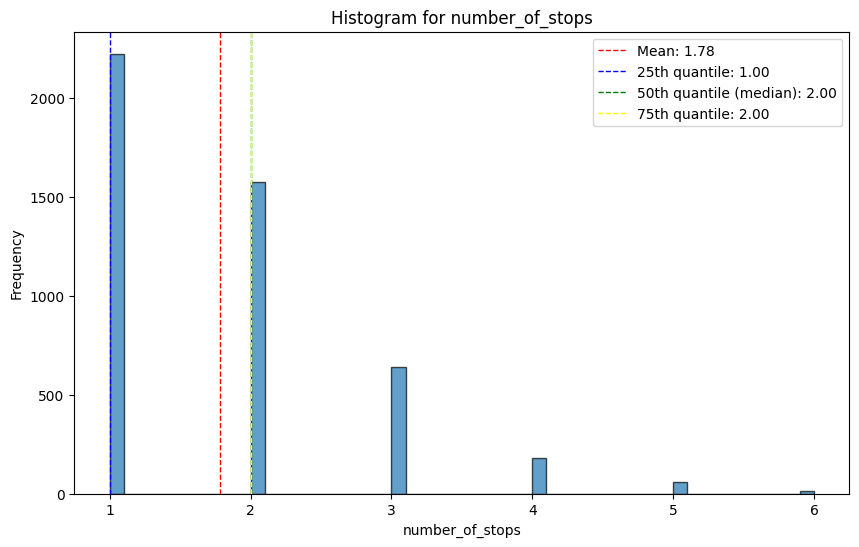

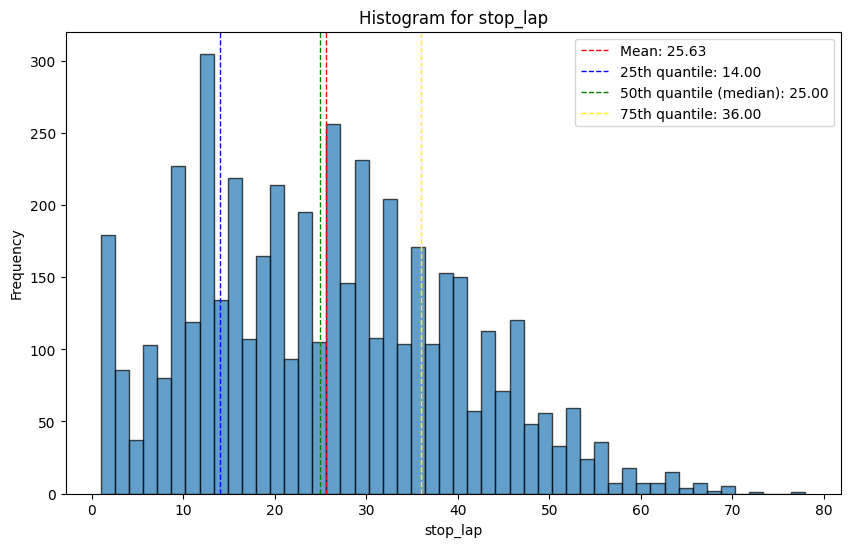

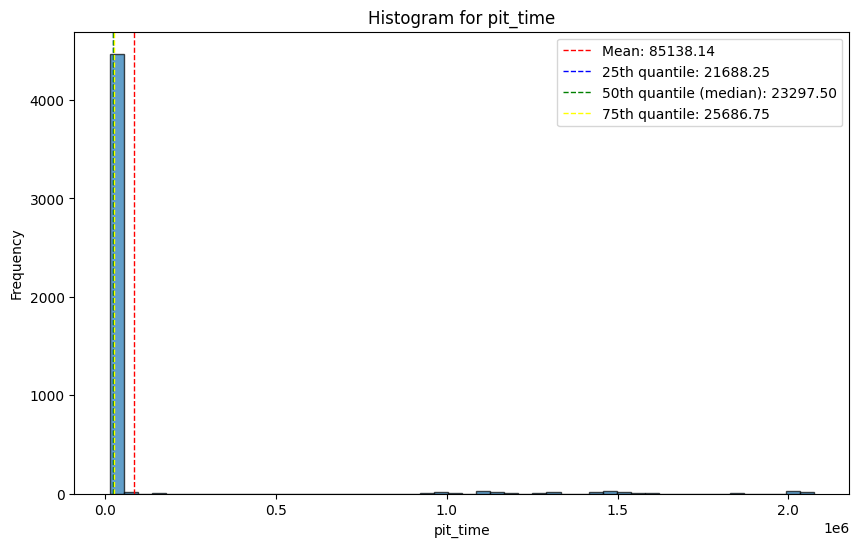

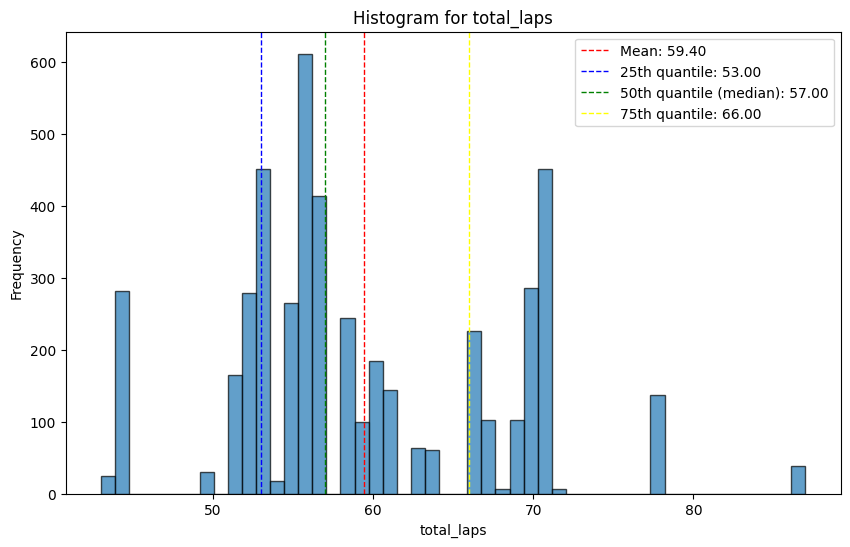

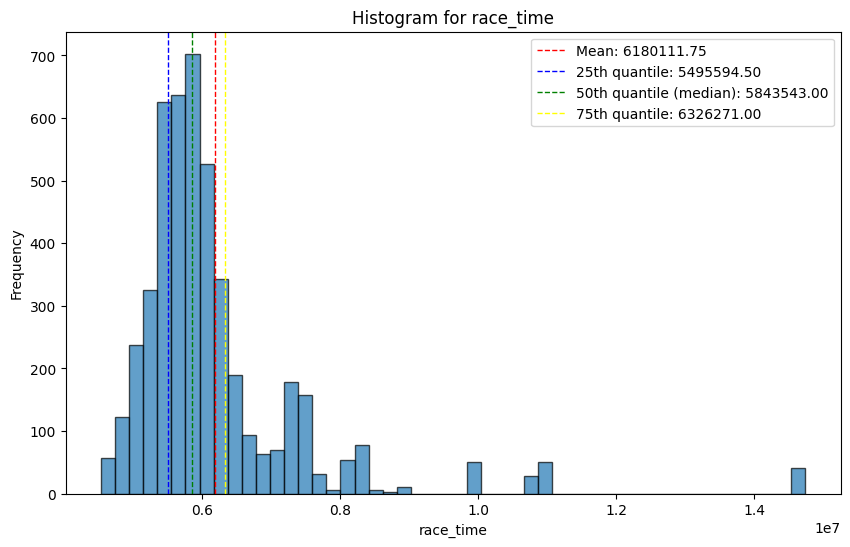

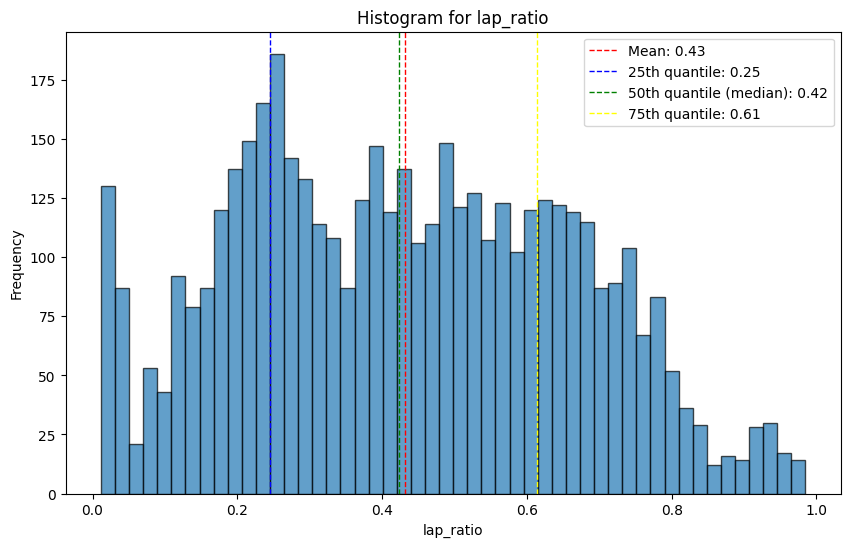

In [153]:
def plot_histograms(dataframe, exclude_columns=[]):
    """
    Plots histograms for numerical columns in the provided dataframe, excluding specified columns.
    Includes lines for mean and quantiles.

    Args:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - exclude_columns (list): List of columns to exclude from plotting.

    Returns:
    - None
    """
    # Filter out the numerical columns and exclude specified columns
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

    # Plot histograms for each numerical column
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        plt.hist(dataframe[column], bins=50, edgecolor='black', alpha=0.7)
        
        # Adding mean and quantiles
        mean_val = dataframe[column].mean()
        quantile_25 = dataframe[column].quantile(0.25)
        quantile_50 = dataframe[column].quantile(0.50)
        quantile_75 = dataframe[column].quantile(0.75)

        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_val:.2f}")
        plt.axvline(quantile_25, color='blue', linestyle='dashed', linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
        plt.axvline(quantile_50, color='green', linestyle='dashed', linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
        plt.axvline(quantile_75, color='yellow', linestyle='dashed', linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# histograms for the dataset minus identifiers
plot_histograms(my_pit, exclude_columns=['raceId', 'driverId'])


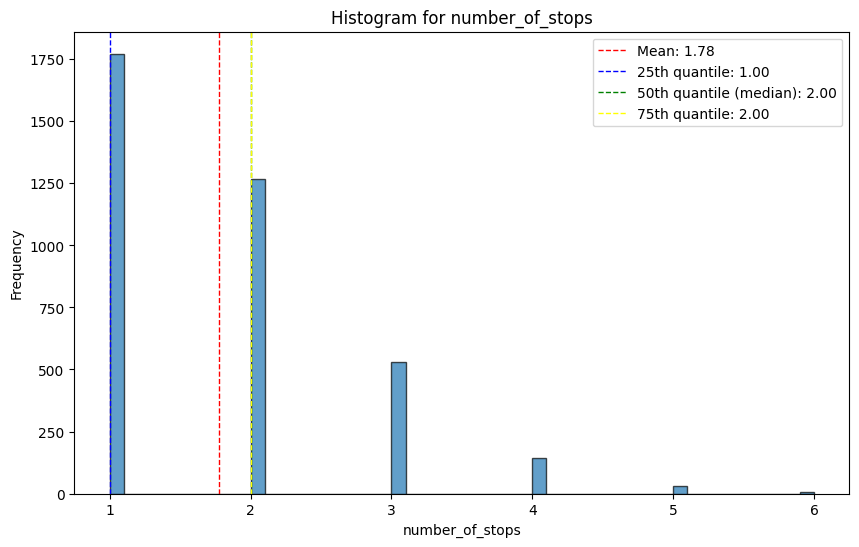

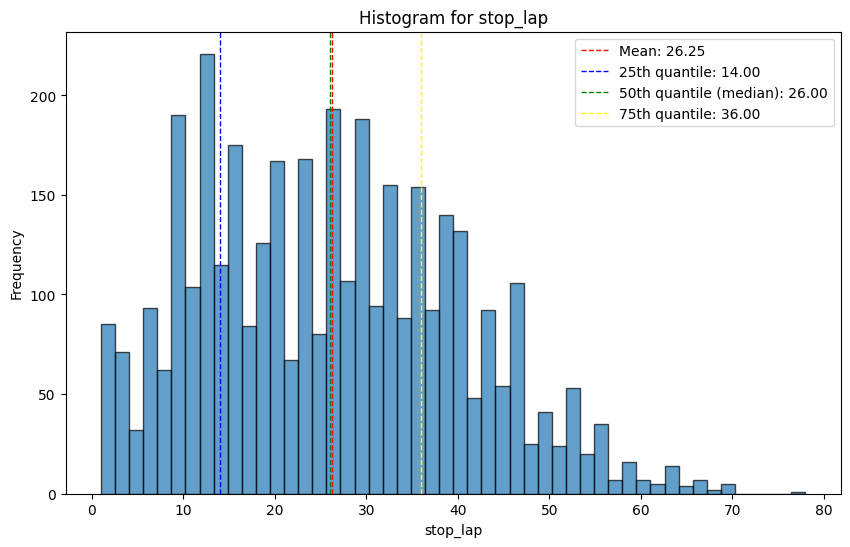

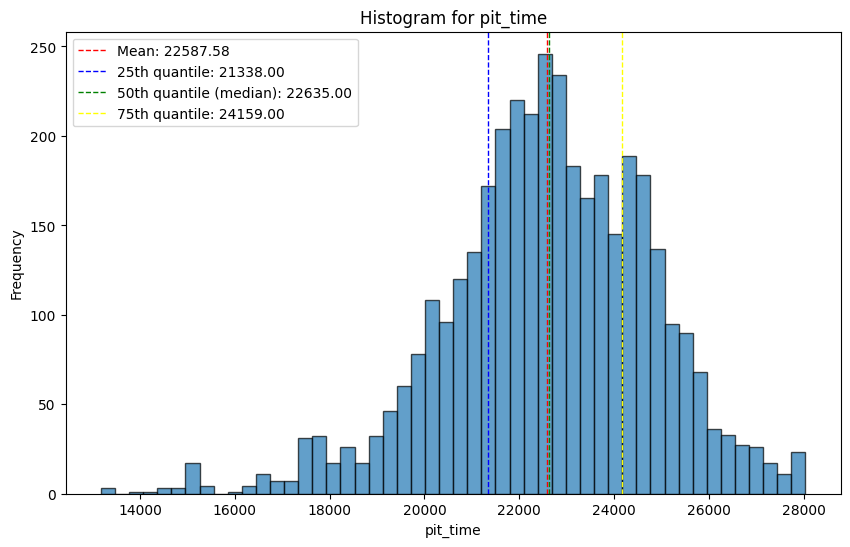

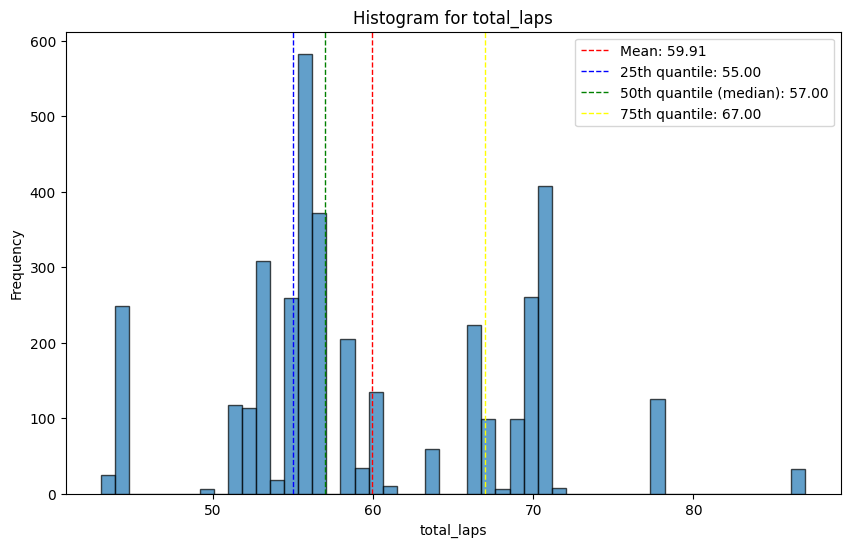

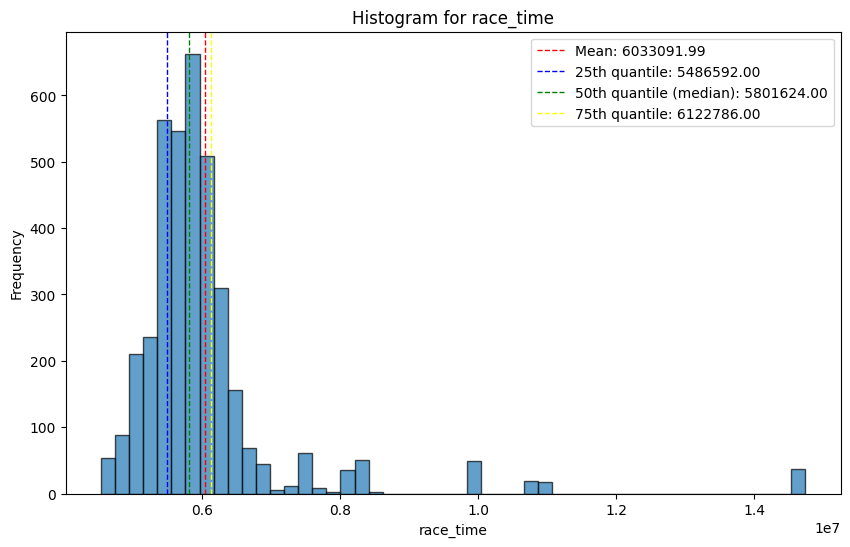

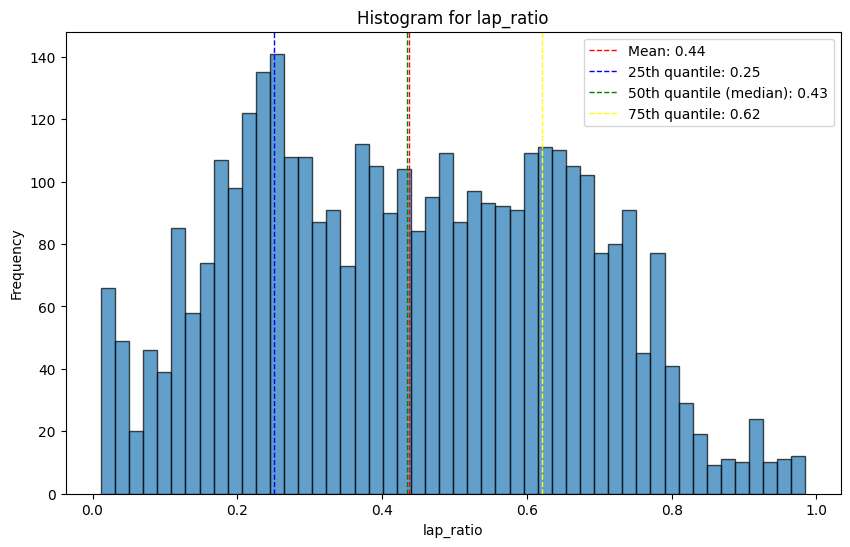

In [159]:
# Calculate the 75th quantile for pit time (Question --> how do I decide on what part to slice on)
quantile_75 = my_pit['pit_time'].quantile(0.80)

# Filter rows where the value in the column is less than or equal to the 75th quantile
my_new_pit = my_pit[my_pit['pit_time'] <= quantile_75]
plot_histograms(my_new_pit, exclude_columns=['raceId', 'driverId'])



In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


X = my_new_pit[['pit_time']]  # Predictor variable
y = my_new_pit['race_time']  # Outcome variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Now you can make predictions on the test data
y_pred = lr.predict(X_test)

# Create a summary DataFrame
summary_data = {
    'Coefficient': lr.coef_,
    'Intercept': lr.intercept_,
    'R-Squared': metrics.r2_score(y_test, y_pred),
    'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
    'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
}

summary_df = pd.DataFrame(summary_data)

# Transpose the DataFrame for a more familiar regression table layout
summary_df = summary_df.T

# Now print or save the summary_df DataFrame to a file
print(summary_df)

                                    0
Coefficient              2.153235e+01
Intercept                5.535109e+06
R-Squared                4.341509e-03
Mean Absolute Error      7.108249e+05
Mean Squared Error       2.055638e+12
Root Mean Squared Error  1.433750e+06


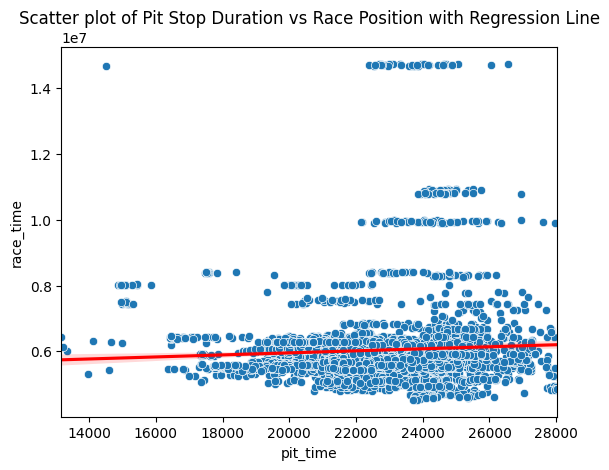

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# sho regression line
sns.scatterplot(x='pit_time', y='race_time', data=my_new_pit)
sns.regplot(x='pit_time', y='race_time', data=my_new_pit, scatter=False, color='red')
plt.title('Scatter plot of Pit Stop Duration vs Race Position with Regression Line')
plt.show()


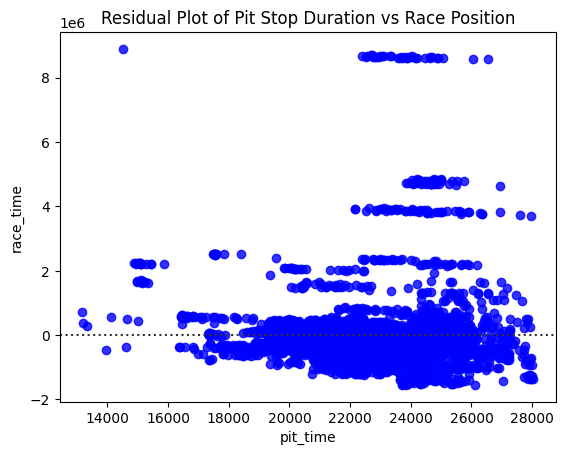

In [156]:
sns.residplot(x='pit_time', y='race_time', data=my_new_pit, color='blue')
plt.title('Residual Plot of Pit Stop Duration vs Race Position')
plt.show()


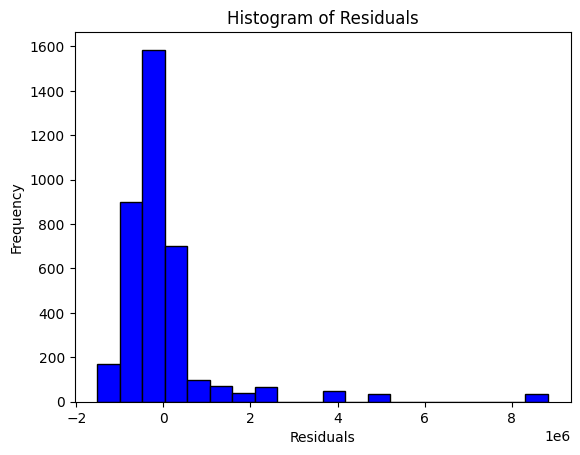

In [157]:
import numpy as np


y_pred = lr.predict(X)
residuals = y - y_pred

plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


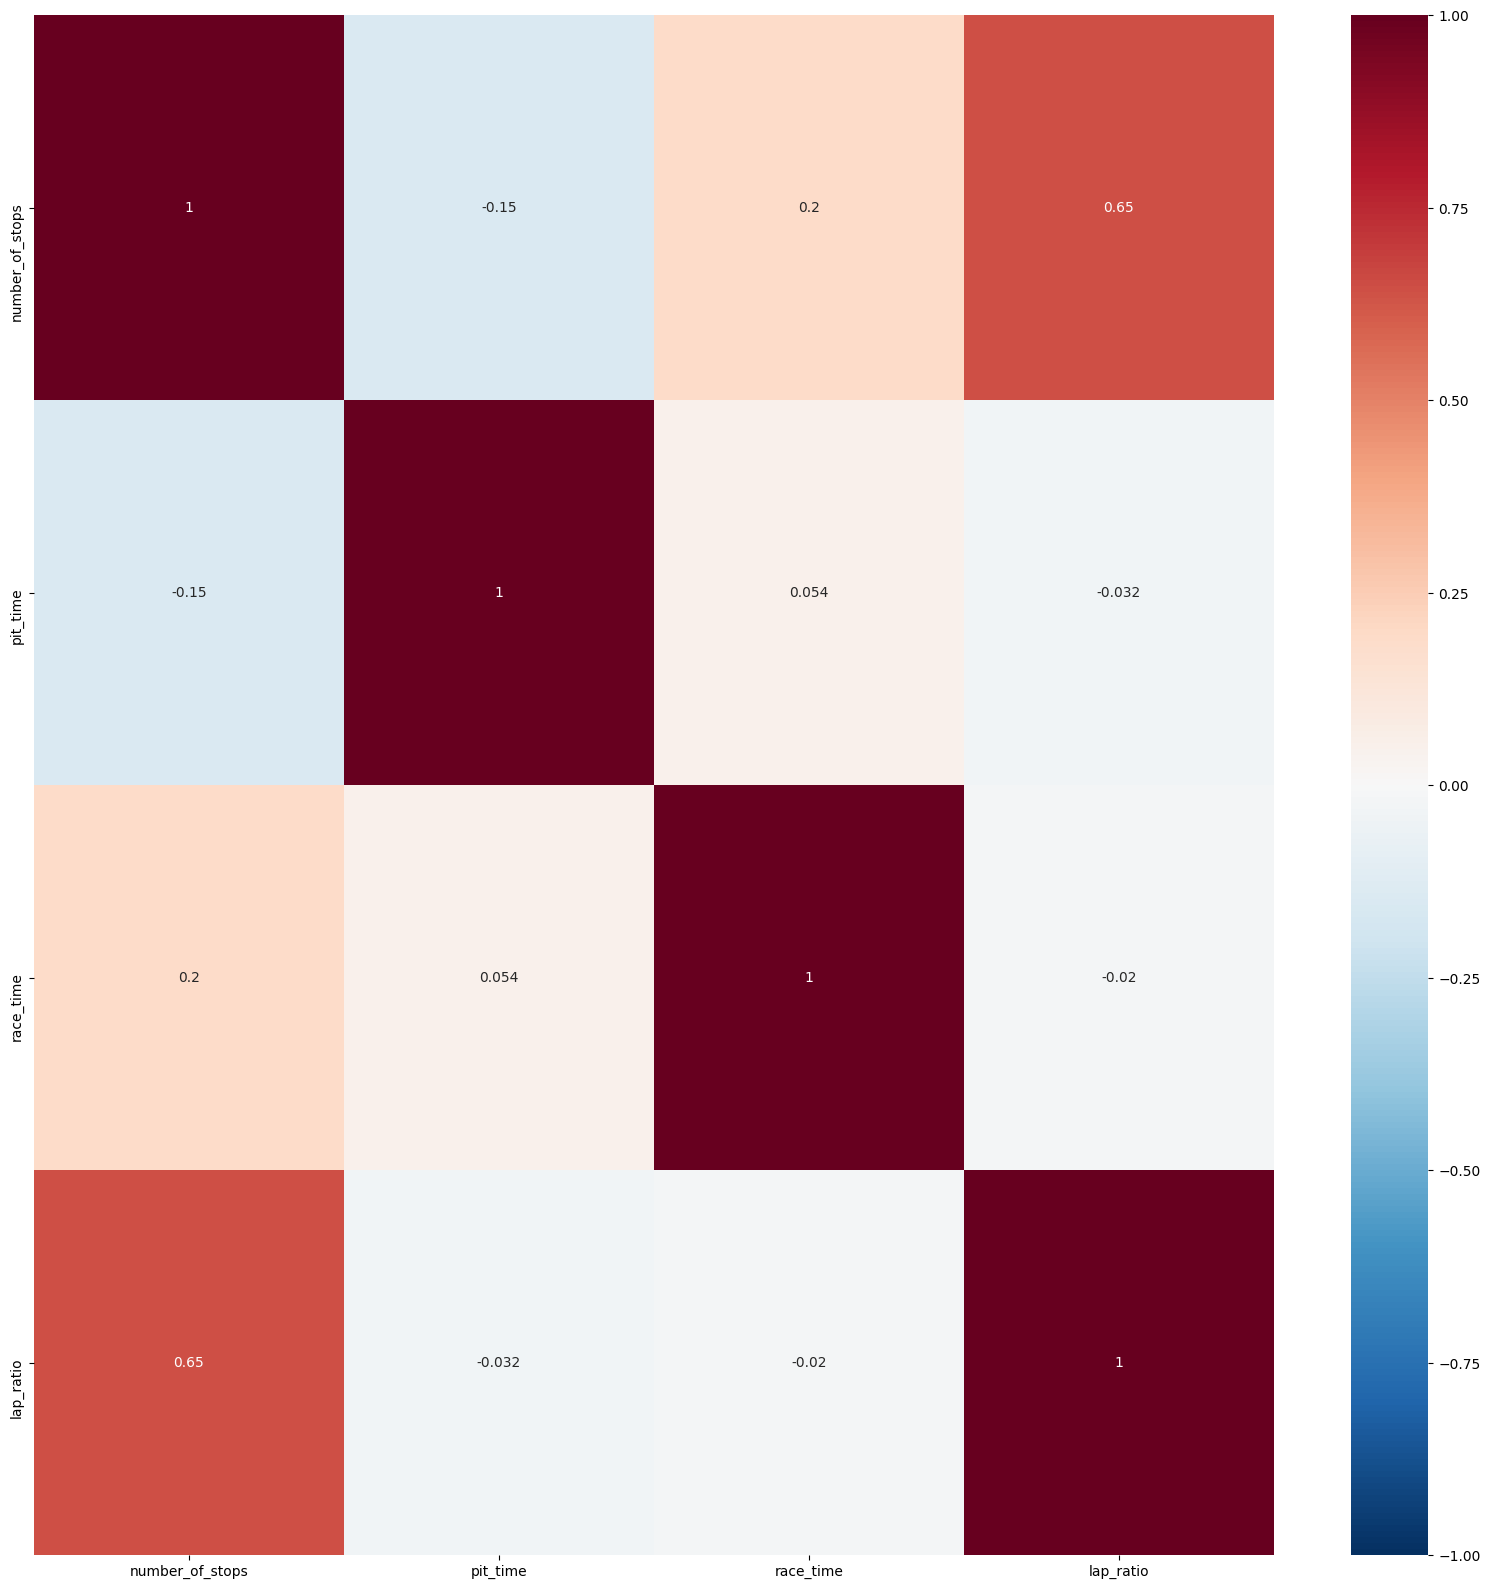

In [160]:
my_col = ['number_of_stops', 'pit_time', 'race_time', 'lap_ratio']
correlation_matrix = my_new_pit[my_col].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

In [139]:
grouped_by_race = my_pit.groupby('raceId')
average_pitstop_duration = grouped_by_race['pit_time'].mean()
average_pitstop_duration

raceId
841      23495.111111
842      23372.828571
843      21698.970588
844      22097.644444
845      20294.866667
            ...      
1070     22205.800000
1071     20580.600000
1072    844303.733333
1073     21750.529412
1074     25460.980000
Name: pit_time, Length: 218, dtype: float64

RMSE: 1073355.934692
Relative Error (range): 0.1051
Relative Error (mean): 0.1779


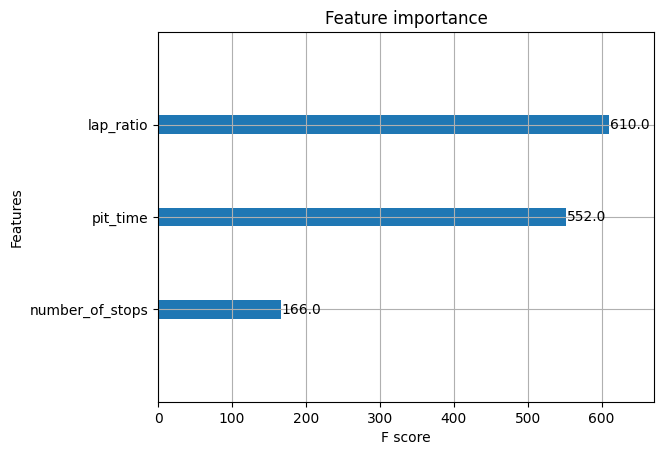

In [161]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X = my_new_pit[['number_of_stops', 'lap_ratio', 'pit_time']] 
y = my_new_pit['race_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the model
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', 
                                 colsample_bytree = 0.3, 
                                 learning_rate = 0.5,
                                 max_depth = 5, 
                                 alpha = 10, 
                                 n_estimators = 100)

# Fit the model
xgb_regressor.fit(X_train, y_train)

# Predict
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False) # RMSE
print("RMSE: %f" % (rmse))

# Relative error with respect to the range
relative_error_range = rmse / (my_new_pit['race_time'].max() - my_new_pit['race_time'].min())

# Relative error with respect to the mean
relative_error_mean = rmse / my_new_pit['race_time'].mean()

print(f"Relative Error (range): {relative_error_range:.4f}")
print(f"Relative Error (mean): {relative_error_mean:.4f}")

# If you want to visualize feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_regressor)
plt.show()
